In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


iris = load_iris()
X = iris.data             
y = iris.target.reshape(-1, 1)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [19]:

input_size = 4
hidden_size = 6
output_size = 3


np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [20]:

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True)) 
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [21]:
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2


In [22]:
z1, a1, z2, y_pred = forward(X_train)
print("Output shape:", y_pred.shape)
print("First prediction (probabilities):", y_pred[0])


Output shape: (120, 3)
First prediction (probabilities): [9.98033850e-01 1.25255025e-03 7.13599347e-04]


In [23]:
def cross_entropy(y_true, y_pred):
    epsilon = 1e-9
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))


In [24]:
def train(X, y, epochs, learning_rate):
    global W1, b1, W2, b2
    loss_history = []

    for epoch in range(epochs):
        z1 = np.dot(X, W1) + b1
        a1 = relu(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = softmax(z2)

        loss = cross_entropy(y, a2)
        loss_history.append(loss)

       
        dz2 = a2 - y                        
        dW2 = np.dot(a1.T, dz2) / X.shape[0]
        db2 = np.sum(dz2, axis=0, keepdims=True) / X.shape[0]

     
        da1 = np.dot(dz2, W2.T)
        dz1 = da1 * relu_derivative(z1)
        dW1 = np.dot(X.T, dz1) / X.shape[0]
        db1 = np.sum(dz1, axis=0, keepdims=True) / X.shape[0]

      
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

      
        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")

    return loss_history


In [25]:
losses = train(X_train, y_train, epochs=1000, learning_rate=0.1)


Epoch 1/1000 - Loss: 1.2859
Epoch 100/1000 - Loss: 0.3991
Epoch 200/1000 - Loss: 0.2909
Epoch 300/1000 - Loss: 0.2053
Epoch 400/1000 - Loss: 0.1477
Epoch 500/1000 - Loss: 0.1152
Epoch 600/1000 - Loss: 0.0951
Epoch 700/1000 - Loss: 0.0830
Epoch 800/1000 - Loss: 0.0757
Epoch 900/1000 - Loss: 0.0706
Epoch 1000/1000 - Loss: 0.0669


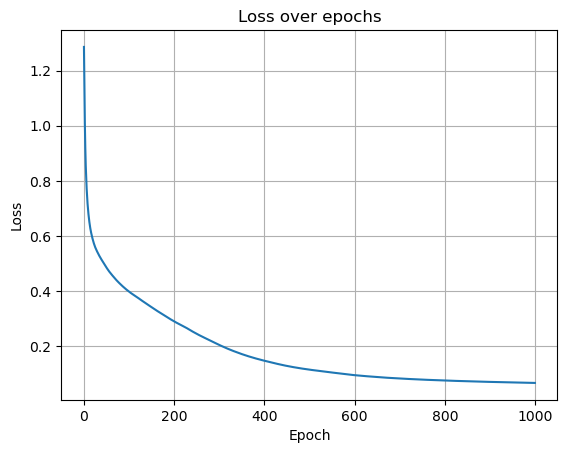

In [26]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [27]:
def predict(X):
    _, a1, _, a2 = forward(X)
    return np.argmax(a2, axis=1)


y_pred_test = predict(X_test)
y_true_test = np.argmax(y_test, axis=1)


accuracy = np.mean(y_pred_test == y_true_test)
print("Test Accuracy:", round(accuracy * 100, 2), "%")


Test Accuracy: 100.0 %


In [28]:
for i in range(10):
    print(f"Sample {i+1} → Predicted: {y_pred_test[i]}, Actual: {y_true_test[i]}")


Sample 1 → Predicted: 1, Actual: 1
Sample 2 → Predicted: 0, Actual: 0
Sample 3 → Predicted: 2, Actual: 2
Sample 4 → Predicted: 1, Actual: 1
Sample 5 → Predicted: 1, Actual: 1
Sample 6 → Predicted: 0, Actual: 0
Sample 7 → Predicted: 1, Actual: 1
Sample 8 → Predicted: 2, Actual: 2
Sample 9 → Predicted: 1, Actual: 1
Sample 10 → Predicted: 1, Actual: 1


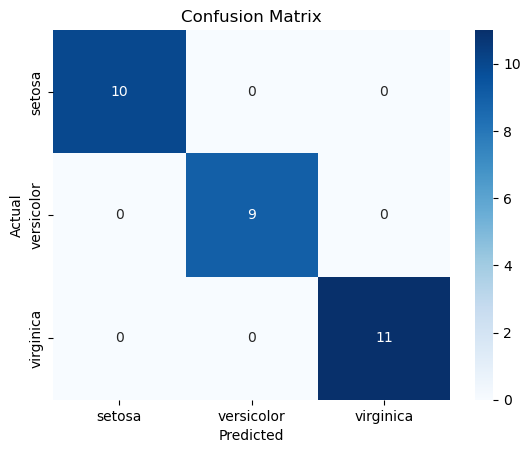

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
